In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerías utilizadas

In [ ]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hotels = pd.read_csv("/content/drive/MyDrive/Kung Fu Pandas/hotels_train.csv")
pd.set_option('display.max_columns', None)
hotels.head()


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


# Análisis Exploratorio y Preprocesamiento de Datos

# A) Exploración Inicial

### Analisis de las correlaciones existentes entre las variables.






Para el análisis de las correlaciones entre las variables, primero armamos una matriz que muestre las correlaciones entre todas las variables cuantitativas.

In [ ]:
matrix_corr = hotels.corr()
matrix_corr

<ipython-input-11-49280b057c61>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = hotels.corr()


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


Para una mejor visualización de los datos usamos un heatmap en donde los colores más oscuros indican una mayor correlación.

Text(0.5, 1.0, 'Correlación de Variables')

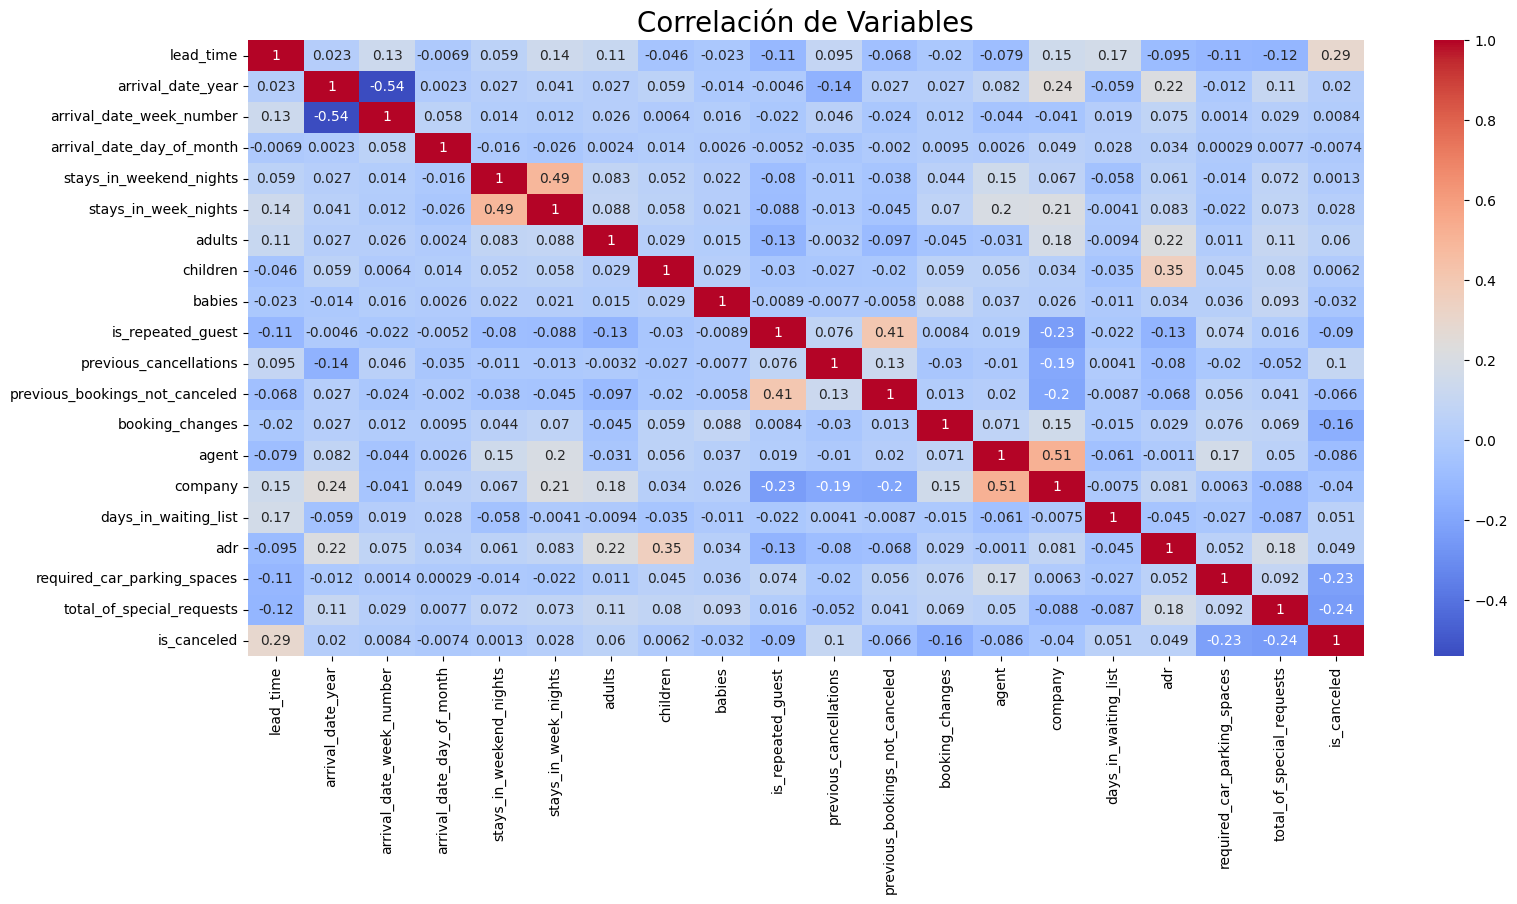

In [ ]:
#Grafico la matriz de correlación en un Heatmap
plt.figure(figsize = (18,8))
sns.heatmap(matrix_corr, annot = True, cmap='coolwarm').set_title('Correlación de Variables', size = 20)

Analizando las correlaciones obtenidas, vemos que no se da ninguna demasiado fuerte. A continuación analizamos algunas:

*   Se destaca por sobre las demás la correlación negativa de **-0,54** entre **arrival_date_week_number** y **arrival_date_year** lo que indicaría que a medida que pasan los años, la gente prefiere viajar en las primeras semanas. Sin embargo, la correlación no es muy fuerte.

*   En segundo lugar, con una correlación positiva entre las variables **company** y **agent** de **0,51**. No es una correlación fuerte y se da por la elección arbitraria de IDs para las empresas y agencias de viajes que hicieron la reserva.

*   Luego está la correlación  positiva entre **previous_bookings_not_canceled** y **is_repeated_guest** de **0,41**. Es la más lógica hasta ahora, dado que si ya estuvo anteriormente en el hotel, tiene al menos una reserva no cancelada.



*   Otra correlación que se puede considerar como lógica, es la correlación positiva entre **children** y **adr**. A mayor número de niños, mayor es la tarifa. Esta correlación es solo de **0,35**.



### Analizar la relación de las variables con el target






#### Variables cuantitativas

*   Entre las correlaciones de **is_canceled** con las demás variables se destaca **lead_time**. Es una correlación positiva, lo cual indicaría que las reservas que se hacen con mayor anticipación, tienden a cancelarse. Si bien es solo de **0,29**, es la correlación más fuerte que tiene la variable **is_canceled**.

* La segunda más fuerte, se da con la variable **total_of_special-requests**. Es una correlación negativa de **-0,24** lo que indicaría que a mayor cantidad de requerimientos, menos cancelaciones. Se podría pensar que el hotel cumple con los requerimientos especiales, por lo que el cliente se siente satisfecho.

* Por último, bastante similar a la anterior es la correlación de **-0,23** con **RequiredCardParkingSpaces**. Tambien se podría pensar que cuando el hotel cumple los requerimientos, el cliente no cancela.

#### Variables cualitativas

Para analizar la correlación de las variables cualitativas con el target, armamos un crosstab con cada una y las visualizamos en un heatmap.

Text(0.5, 1.0, 'Arrival date month')

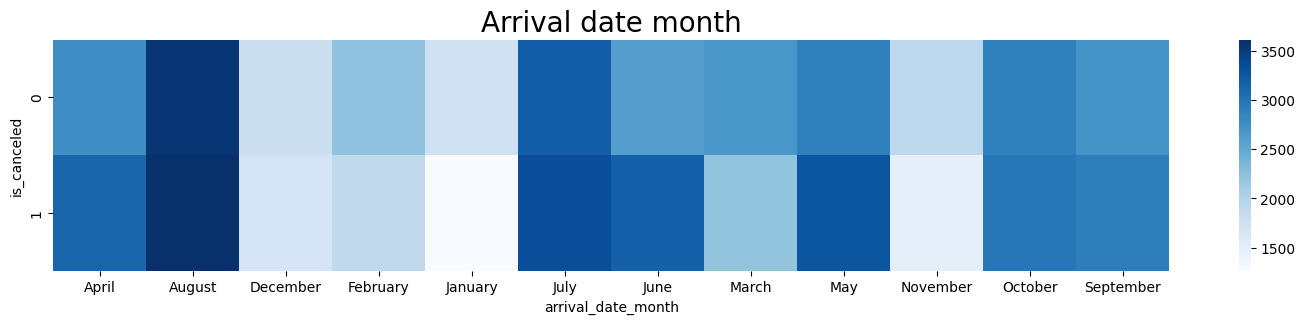

In [ ]:
ct = pd.crosstab(hotels['is_canceled'], hotels['arrival_date_month'])
plt.figure(figsize = (18,3))
sns.heatmap(ct, annot=False, cmap='Blues').set_title('Arrival date month', size = 20)

Text(0.5, 1.0, 'Meal')

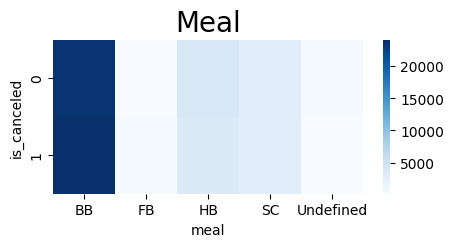

In [ ]:
ct = pd.crosstab(hotels['is_canceled'], hotels['meal'])
plt.figure(figsize = (5,2))
sns.heatmap(ct, annot=False, cmap='Blues').set_title('Meal', size = 20)

Text(0.5, 1.0, 'Country')

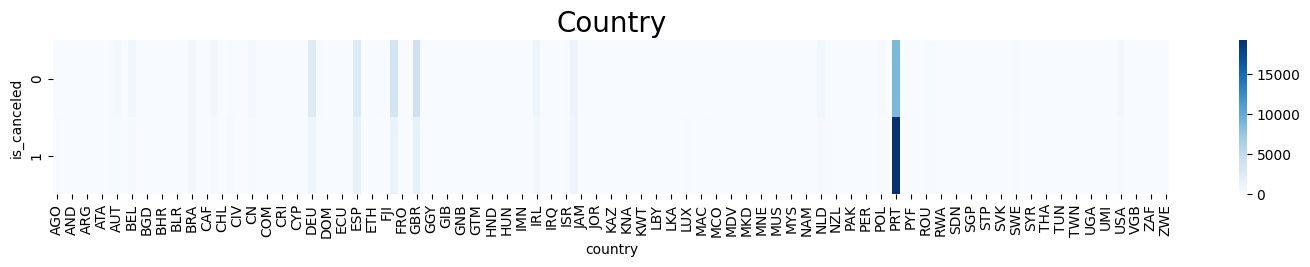

In [ ]:
ct = pd.crosstab(hotels['is_canceled'], hotels['country'])
plt.figure(figsize = (18,2))
sns.heatmap(ct, annot=False, cmap='Blues').set_title('Country', size = 20)

En este gráfico se puede observar que la mayoría de los portugueses cancelan la reserva.

Text(0.5, 1.0, 'Distribution Channel')

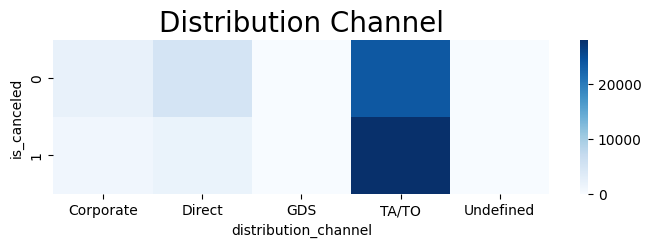

In [ ]:
ct = pd.crosstab(hotels['is_canceled'], hotels['distribution_channel'])
plt.figure(figsize = (8,2))
sns.heatmap(ct, annot=False, cmap='Blues').set_title('Distribution Channel', size = 20)

Text(0.5, 1.0, 'Market Segment')

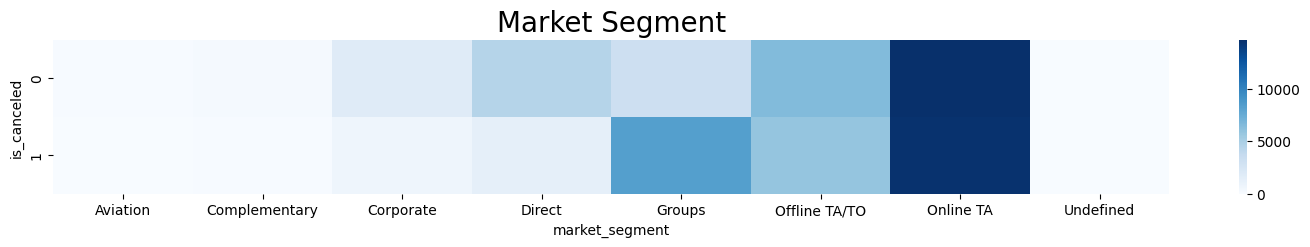

In [ ]:
ct = pd.crosstab(hotels['is_canceled'], hotels['market_segment'])
plt.figure(figsize = (18,2))
sns.heatmap(ct, annot=False, cmap='Blues').set_title('Market Segment', size = 20)

De este gráfico se destaca la categoría "Groups" debido a que la mayoría cancela la reserva.

## customer_type

[Text(0.5, 1.0, 'Reservas canceladas por tipo de cliente'),
 Text(0, 0.5, 'Tipo de cliente'),
 Text(0.5, 0, 'Cantidad de reservas')]

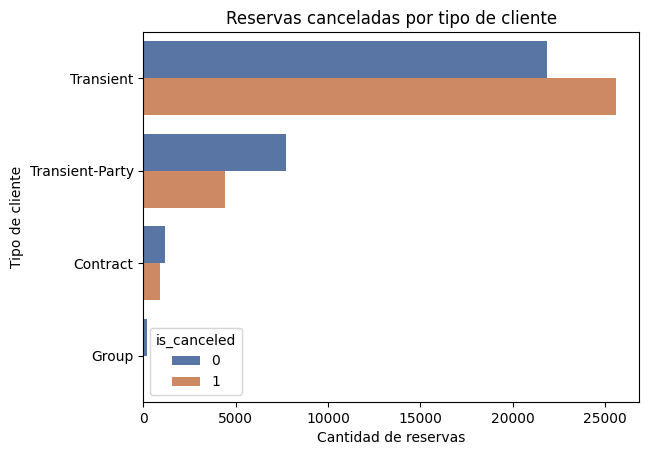

In [ ]:
# fig, (full, ax_refundable) = plt.subplots(1, 2, figsize=(15,6))
# refundable = hotels[hotels['deposit_type'] == 'Refundable']
sns.countplot(data = hotels, y = "customer_type", hue = "is_canceled", palette = 'deep').set(title = "Reservas canceladas por tipo de cliente", ylabel="Tipo de cliente", xlabel="Cantidad de reservas")
#sns.countplot(data = refundable, x="deposit_type", hue="is_canceled", palette = 'deep', ax = ax_refundable).set(title="Reservas canceladas con seña parcial",xlabel="Tipo de deposito",ylabel="Cantidad de reservas")

De la categoría Transient, son más los que cancelan que los que no.


## reserved_room_type

Analicemos las reservas canceladas relacionadas con el tipo de habitacion reservada.

[Text(0.5, 1.0, 'Reservas canceladas por tipo de habitacion reservada'),
 Text(0.5, 0, 'Cantidad de Reservas'),
 Text(0, 0.5, 'Tipo de habitacion reservada')]

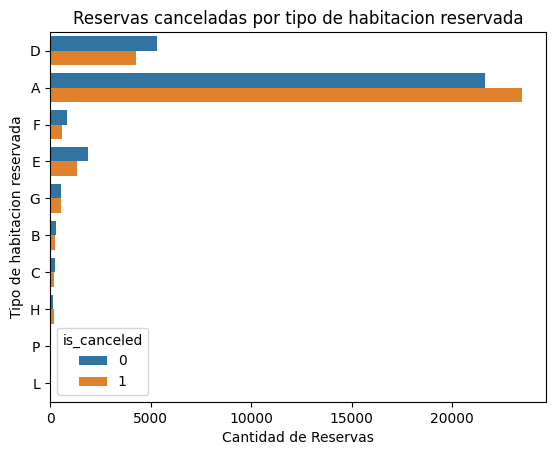

In [ ]:
reserved_room_types = hotels.groupby('reserved_room_type')['is_canceled'].value_counts()
sns.countplot(data = hotels, y="reserved_room_type", hue="is_canceled").set(title="Reservas canceladas por tipo de habitacion reservada",xlabel="Cantidad de Reservas",ylabel="Tipo de habitacion reservada")

Vemos que en todas las categorias hay una cantidad pareja de reservas canceladas y no canceladas, con lo cual no podemos sacar conclusiones fuertes en base a esta variable.

## assigned_room_type

[Text(0.5, 1.0, 'Reservas canceladas por tipo de habitacion asignada'),
 Text(0.5, 0, 'Cantidad de Reservas'),
 Text(0, 0.5, 'Tipo de habitacion asignada')]

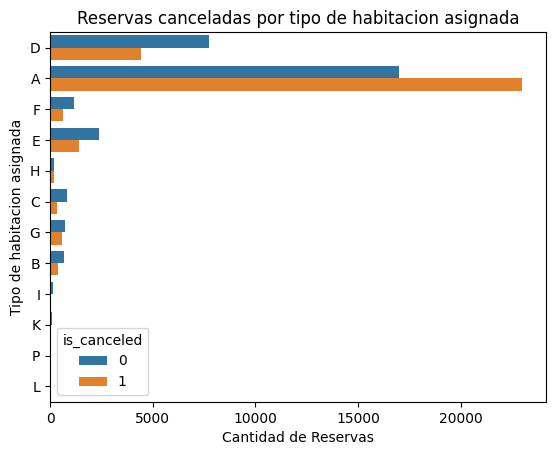

In [ ]:
reserved_room_types = hotels.groupby('reserved_room_type')['is_canceled'].value_counts()
sns.countplot(data = hotels, y="assigned_room_type", hue="is_canceled").set(title="Reservas canceladas por tipo de habitacion asignada",xlabel="Cantidad de Reservas",ylabel="Tipo de habitacion asignada")

Veamos que pasa cuando la habitacion reservada por el cliente coincide con la asignada por el hotel

[Text(0.5, 1.0, 'Reservas canceladas si la habitacion reservada no coincide con la asignada'),
 Text(0.5, 0, 'Cantidad de Reservas'),
 Text(0, 0.5, 'Tipo de habitacion')]

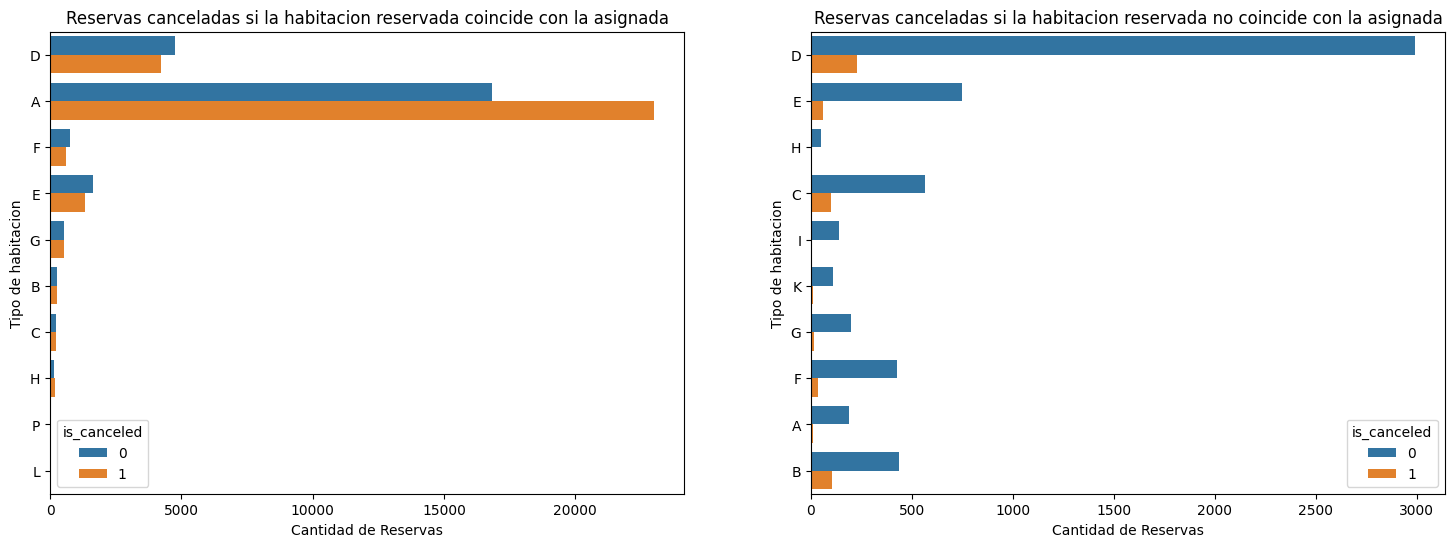

In [ ]:
fig, (match_, no_match) = plt.subplots(1, 2, figsize=(18,6))
filtered_by_room_coincidence = hotels[hotels['reserved_room_type'] == hotels['assigned_room_type']]
filtered_by_no_room_coincidence = hotels[hotels['reserved_room_type'] != hotels['assigned_room_type']]
sns.countplot(data = filtered_by_room_coincidence, y="assigned_room_type", ax = match_ ,hue="is_canceled").set(title="Reservas canceladas si la habitacion reservada coincide con la asignada",xlabel="Cantidad de Reservas",ylabel="Tipo de habitacion")
sns.countplot(data = filtered_by_no_room_coincidence, y="assigned_room_type", ax = no_match, hue="is_canceled").set(title="Reservas canceladas si la habitacion reservada no coincide con la asignada",xlabel="Cantidad de Reservas",ylabel="Tipo de habitacion")

Sorprendentemente los casos donde la habitacion reservada no coincide con la asignada no suelen ser cancelados, lo cual es contraintuitivo. Otra consideracion es que las reservas de habitaciones tipo A suelen ser canceladas.

## deposit_type

[Text(0.5, 1.0, 'Reservas canceladas con seña parcial'),
 Text(0.5, 0, 'Tipo de deposito'),
 Text(0, 0.5, 'Cantidad de reservas')]

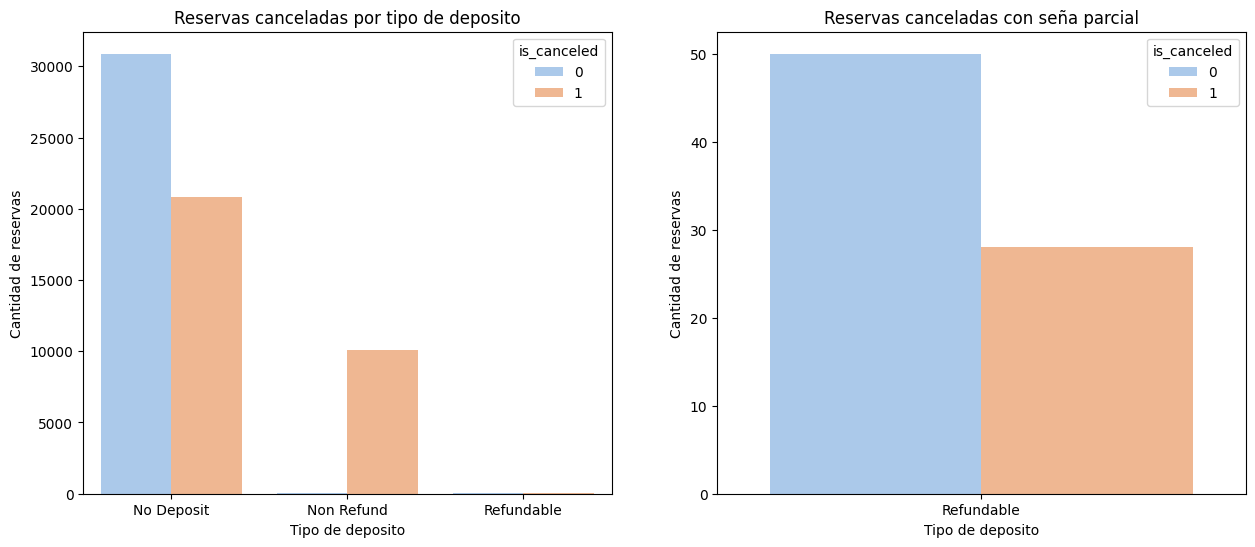

In [ ]:
fig, (full, ax_refundable) = plt.subplots(1, 2, figsize=(15,6))
refundable = hotels[hotels['deposit_type'] == 'Refundable']
sns.countplot(data = hotels, x="deposit_type", hue="is_canceled", palette = 'pastel', ax = full).set(title="Reservas canceladas por tipo de deposito",xlabel="Tipo de deposito",ylabel="Cantidad de reservas")
sns.countplot(data = refundable, x="deposit_type", hue="is_canceled", palette = 'pastel', ax = ax_refundable).set(title="Reservas canceladas con seña parcial",xlabel="Tipo de deposito",ylabel="Cantidad de reservas")

Se puede ver que las reservas donde se abono el total del costo en anticipacion fueron canceladas en su gran mayoria. Mientras que aquellas donde hubo una seña parcial o no la hubo predominan las reservas no canceladas.

#### Distribucion de las variables

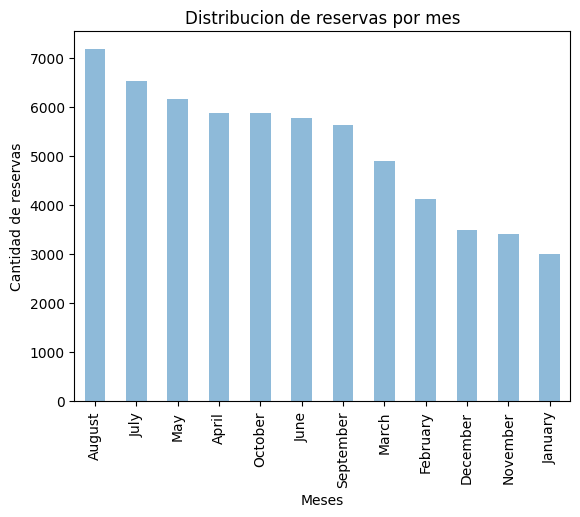

In [ ]:
grf_months=hotels['arrival_date_month'].value_counts().plot.bar(alpha=0.5 , title="Distribucion de reservas por mes" , xlabel="Meses" , ylabel="Cantidad de reservas")

En este grafico de barras se puede visualizar que la mayoria de las reservas en los hoteles se producen en los meses de mitad de año.

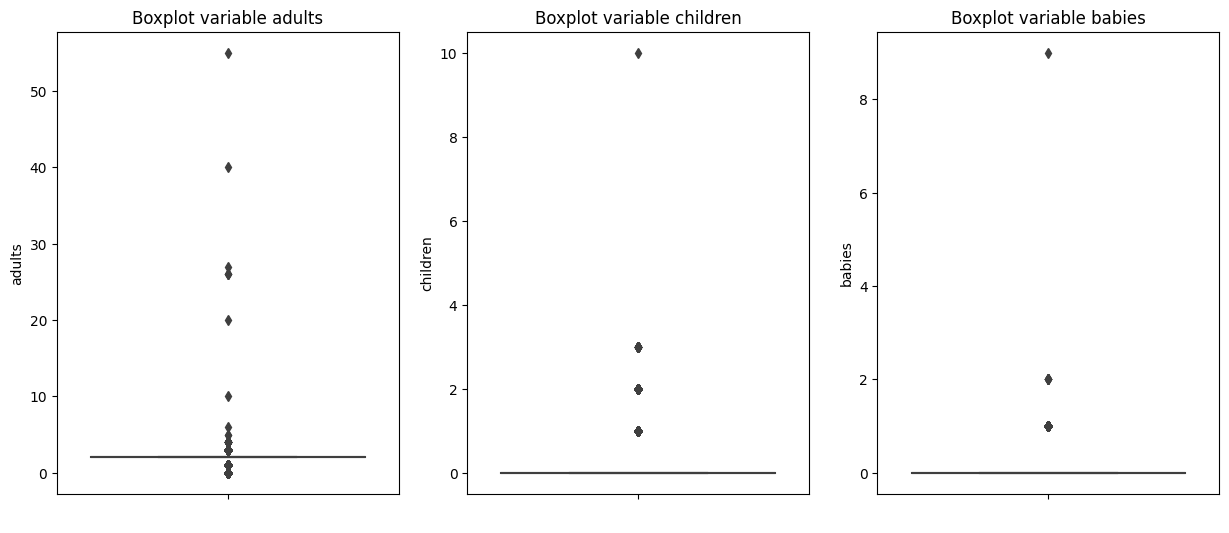

In [ ]:
fig, (adults_boxplot, children_boxplot, babies_boxplot) = plt.subplots(1, 3, figsize=(15,6))
grf_adults = sns.boxplot(y="adults", data = hotels, ax = adults_boxplot).set(title="Boxplot variable adults",xlabel=" ",ylabel="adults")
grf_children = sns.boxplot(y="children", data=hotels, ax = children_boxplot).set(title="Boxplot variable children",xlabel=" ",ylabel="children")
grf_babies = sns.boxplot(y="babies", data=hotels, ax = babies_boxplot).set(title="Boxplot variable babies",xlabel=" ",ylabel="babies")

Estos boxplots muestran la distribucion de la variable adultos, niños y bebes. El primer grafico se encuentra visiblemente distorsionado debido a que el primer, segundo y tercer cuartil tienen el mismo valor (2.00) y tambien muestra los valores atipicos de hasta 50 adultos en una reserva. Algo similar ocurre con los valores de las variables de children y babies solo que los cuartiles tienen valor 0, y considera atipicos los valores superiores 

[Text(0.5, 1.0, 'Densidad variable noches de semana'),
 Text(0.5, 0, 'noches de semana'),
 Text(0, 0.5, 'Frecuencia')]

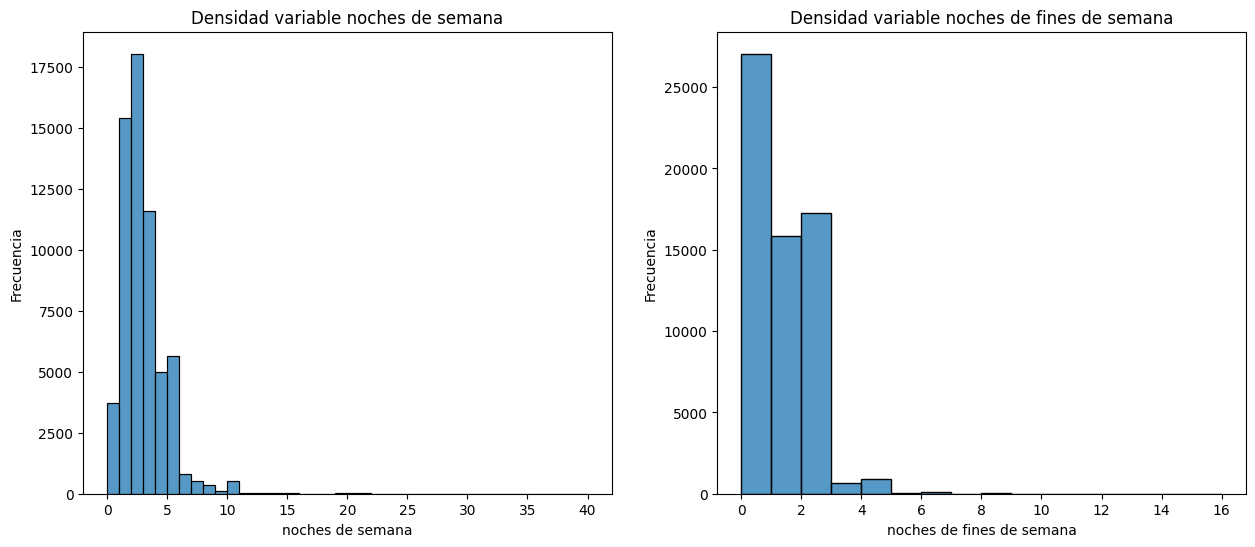

In [ ]:
fig, (week_plot, weekend_plot) = plt.subplots(1, 2, figsize=(15,6))
sns.histplot(data = hotels['stays_in_weekend_nights'], ax = weekend_plot, binwidth = 1).set(title="Densidad variable noches de fines de semana",xlabel="noches de fines de semana",ylabel="Frecuencia")
sns.histplot(data = hotels['stays_in_week_nights'], ax = week_plot, binwidth = 1).set(title="Densidad variable noches de semana",xlabel="noches de semana",ylabel="Frecuencia")

La mayoria de la gente reserva no mas de cinco dias semanales y 2 de fin de semana y la correlacion de estas variables se debe a que la gente que reserva por muchos dias de semana tambien se queda fines de semana por igual

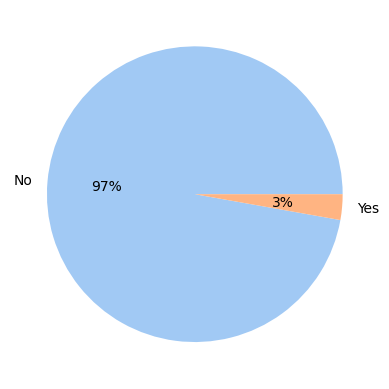

In [ ]:
# repeated_vc = hotels['is_repeated_guest'].value_counts()
# repeated_vc
palette_color = sns.color_palette('pastel')
plt.pie(hotels['is_repeated_guest'].value_counts(), labels=['No', 'Yes'], colors=palette_color, autopct='%.0f%%')
plt.show();

Casi todos los clientes no son repetidos, es decir, no reservaron en el mismo hotel en otra ocasion

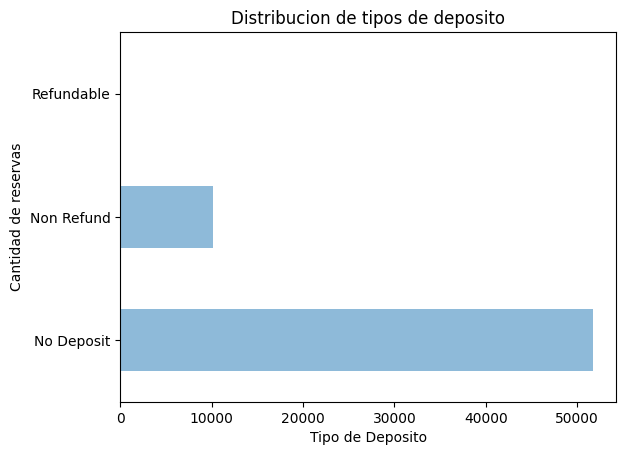

In [ ]:
grf_months = hotels['deposit_type'].value_counts().plot.barh(alpha=0.5 , title="Distribucion de tipos de deposito" , xlabel="Tipo de Deposito" , ylabel="Cantidad de reservas")

Se puede observar que la gran mayoria de las reservas no tienen seña y por otra parte, la gente no prefiere señar parcialmente el precio sino que depositarlo completamente.

[Text(0.5, 1.0, 'Histograma variable previous_bookings_not_canceled'),
 Text(0.5, 0, ' '),
 Text(0, 0.5, 'Reservas no canceladas anteriores')]

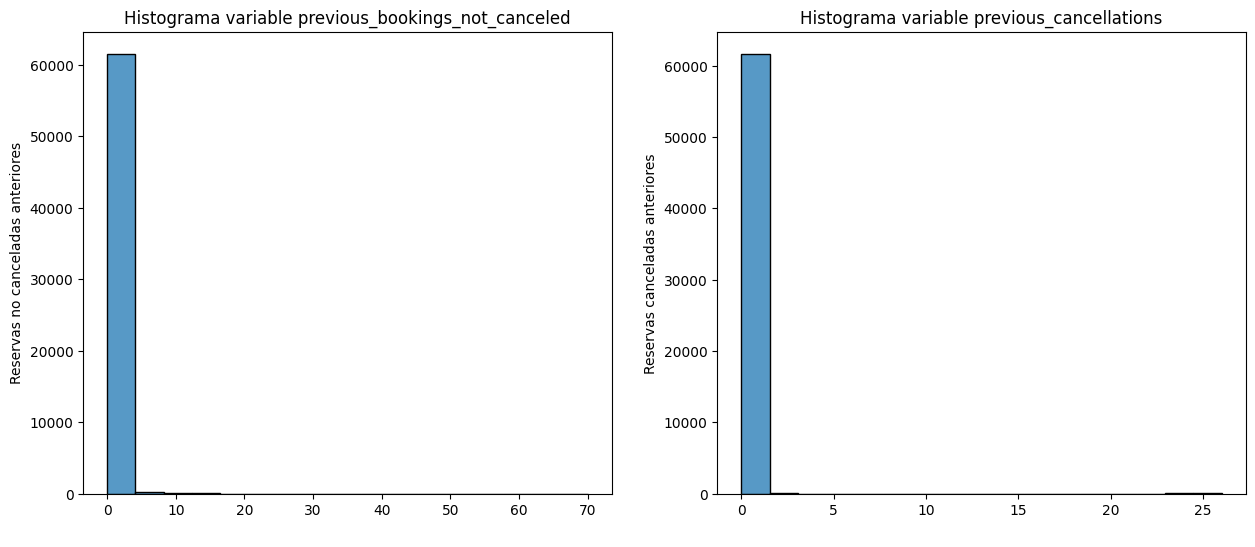

In [ ]:
fig, (prev_bookings_hist, prev_cancellations_hist) = plt.subplots(1, 2, figsize=(15,6))
sns.histplot(data = hotels['previous_cancellations'],ax = prev_cancellations_hist).set(title="Histograma variable previous_cancellations",xlabel=" ",ylabel="Reservas canceladas anteriores")
sns.histplot(data = hotels['previous_bookings_not_canceled'],ax = prev_bookings_hist).set(title="Histograma variable previous_bookings_not_canceled",xlabel=" ",ylabel="Reservas no canceladas anteriores")


Por un lado, en el primer grafico se puede ver que la mayoria de los clientes no reservaron mas de cuatro veces en otras ocasiones, aunque incluso hay casos de clientes que reservaron hasta mas de 60 veces. Mientras, en el otro grafico se puede ver que los casos normales no tienen mas de 3 cancelaciones previas, aunque hay casos atipicos con mas de 25.

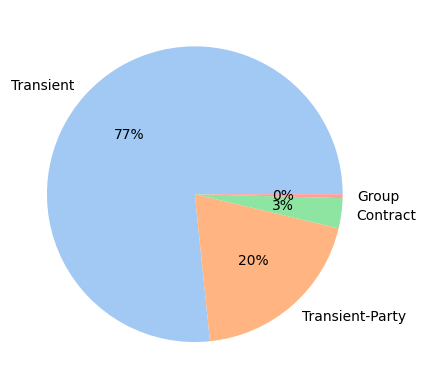

In [ ]:
customer_types = hotels['customer_type'].value_counts()
palette_color = sns.color_palette('pastel')
plt.pie(customer_types, labels=customer_types.index, colors=palette_color, autopct='%.0f%%')
plt.show();

En este grafico podemos observar la division de categorias entre clientes, se puede observar que la gran mayoria pertenece a la categoria Transient, la cual indica que las reservas no estan hechas por clientes asociados por contrato o no pertenecen a un grupo de clientes.

# B) Visualizacion de Datos



## previous_cancellations

[Text(0.5, 1.0, 'Reservas con cancelaciones previas'),
 Text(0.5, 0, 'Cancelaciones Previas'),
 Text(0, 0.5, 'Cantidad')]

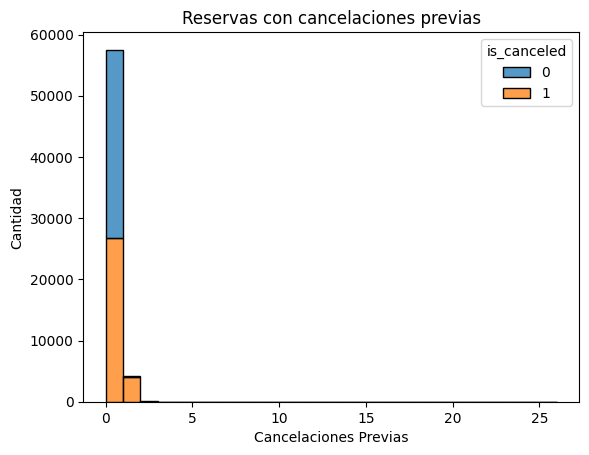

In [ ]:
prev_cancellations = hotels.groupby('previous_cancellations')['is_canceled'].value_counts()
sns.histplot(data = hotels, x="previous_cancellations", hue="is_canceled", multiple="stack", binwidth = 1).set(title="Reservas con cancelaciones previas",xlabel="Cancelaciones Previas",ylabel="Cantidad")

Se puede observar que si el cliente no cancelo reservas en otras ocasiones, las reservas pudieron ser canceladas o no con probabilidad similar, pero si filtramos por aquellas que por lo menos tuvieron una cancelacion previa...

[Text(0.5, 1.0, 'Reservas con por lo menos dos cancelaciones previas'),
 Text(0.5, 0, 'Cancelaciones Previas'),
 Text(0, 0.5, 'Cantidad')]

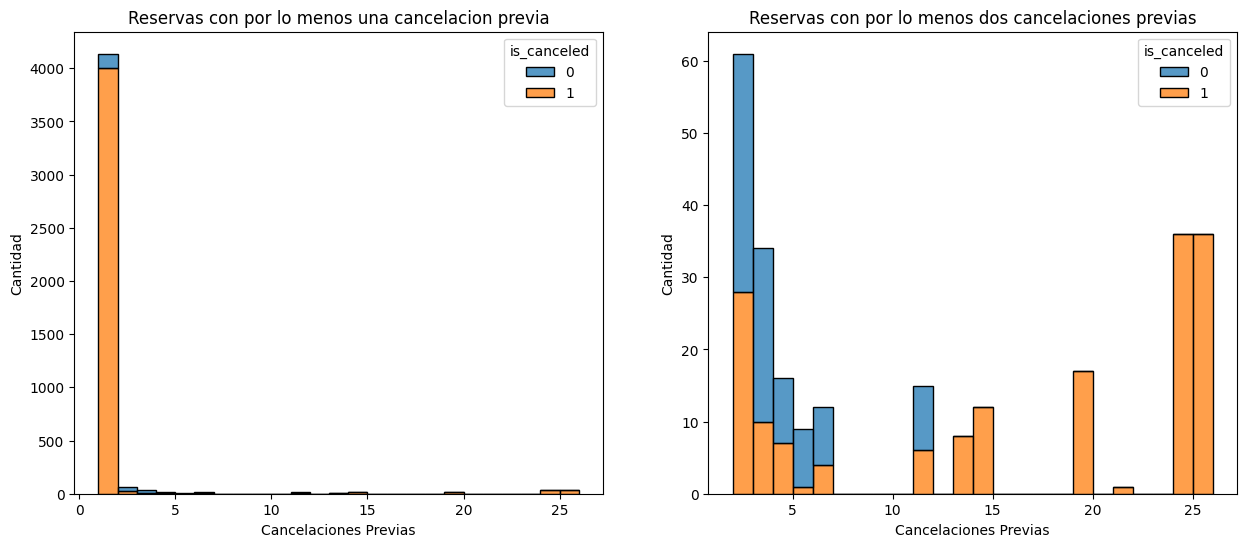

In [ ]:
fig, (over_0, over_1) = plt.subplots(1, 2, figsize=(15,6))
prev_cancellations_filtered_over_0 = hotels[hotels['previous_cancellations'] > 0]
prev_cancellations_filtered_over_1 = hotels[hotels['previous_cancellations'] > 1]
sns.histplot(data = prev_cancellations_filtered_over_0,ax = over_0, x="previous_cancellations", hue="is_canceled", multiple="stack", binwidth = 1).set(title="Reservas con por lo menos una cancelacion previa",xlabel="Cancelaciones Previas",ylabel="Cantidad")
sns.histplot(data = prev_cancellations_filtered_over_1,ax = over_1, x="previous_cancellations", hue="is_canceled", multiple="stack", binwidth = 1).set(title="Reservas con por lo menos dos cancelaciones previas",xlabel="Cancelaciones Previas",ylabel="Cantidad")

Se puede observar que las reservas realizadas por clientes que cancelaron por lo menos una vez en otra ocasión, son mas propensas a ser canceladas.

## previous_bookings_not_cancelled

Por otro lado veamos que pasa con los clientes frecuentes que no cancelaron en ocasiones previas.

[Text(0.5, 1.0, 'Reservas hechas por clientes con reservas previas sin cancelar'),
 Text(0.5, 0, 'Reservas previas no canceladas'),
 Text(0, 0.5, 'Cantidad de Reservas')]

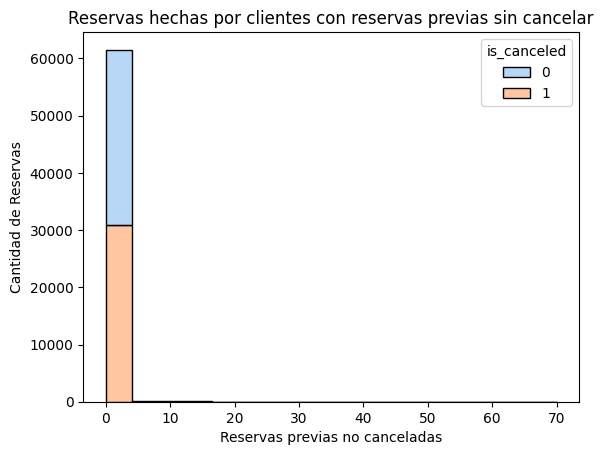

In [ ]:
prev_cancellations = hotels.groupby('previous_bookings_not_canceled')['is_canceled'].value_counts()
sns.histplot(data = hotels, x="previous_bookings_not_canceled", hue="is_canceled", multiple="stack", palette='pastel').set(title="Reservas hechas por clientes con reservas previas sin cancelar",xlabel="Reservas previas no canceladas",ylabel="Cantidad de Reservas")

Similar a **previous_cancellations**, no hay una relacion clara entre clientes que no reservaron nunca previamente y reservas canceladas. Pero veamos aquellos que son clientes recurrentes, es decir, que reservaron por lo menos 1 vez antes.

[Text(0.5, 1.0, 'Reservas hechas por clientes con por lo menos una reserva previa sin cancelar'),
 Text(0.5, 0, 'Reservas previas no canceladas'),
 Text(0, 0.5, 'Cantidad de Reservas')]

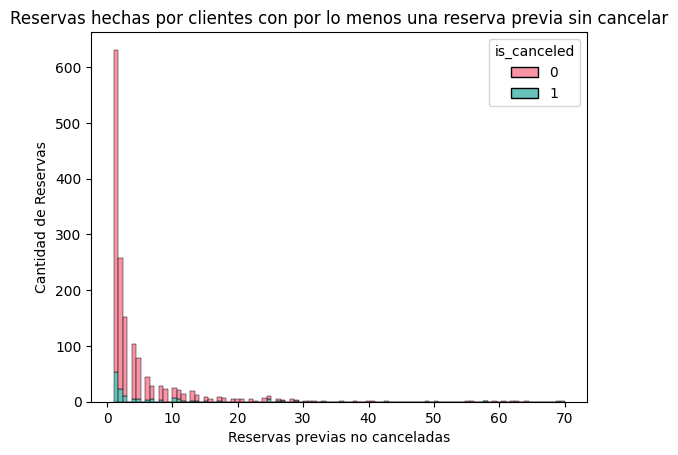

In [ ]:
bookings_not_canceled_over_0 = hotels[hotels['previous_bookings_not_canceled'] > 0]
sns.histplot(data = bookings_not_canceled_over_0, x="previous_bookings_not_canceled", hue="is_canceled", multiple="stack", palette='husl').set(title="Reservas hechas por clientes con por lo menos una reserva previa sin cancelar",xlabel="Reservas previas no canceladas",ylabel="Cantidad de Reservas")

Se puede ver a simple vista que hay una tendencia logica que los clientes que reservaron otras veces y no cancelaron, no cancelan sus nuevas reservas.

## booking_changes



[Text(0.5, 1.0, 'Reservas hechas por clientes que hicieron cambios'),
 Text(0.5, 0, 'Cambios en la reserva'),
 Text(0, 0.5, 'Cantidad de Reservas')]

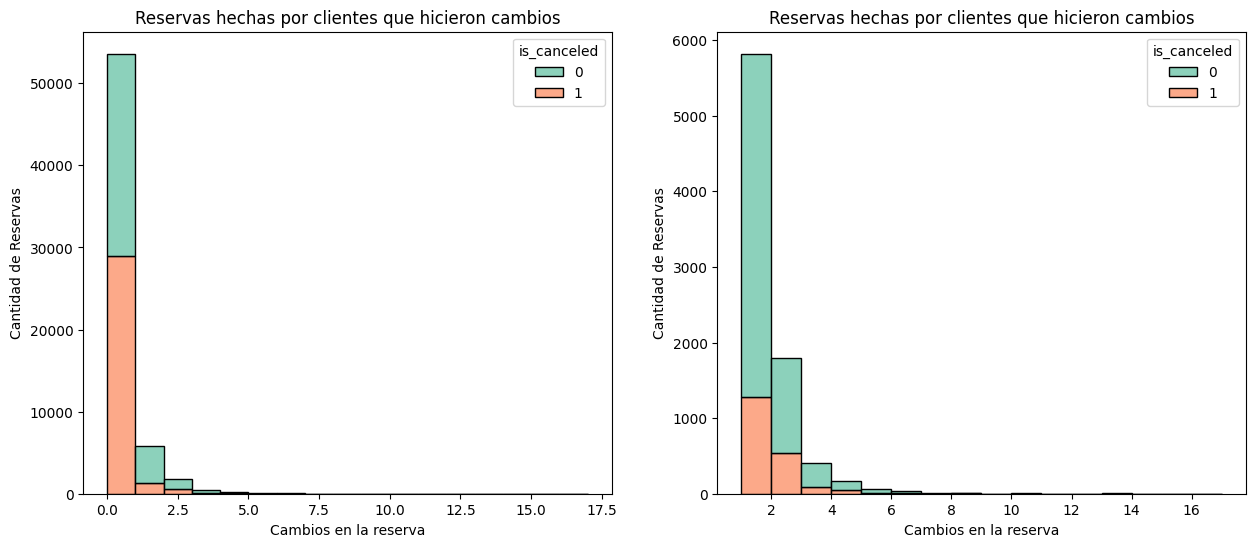

In [ ]:
fig, (full, over_0) = plt.subplots(1, 2, figsize=(15,6))
booking_changes_over_1 = hotels[hotels['booking_changes'] > 0]
sns.histplot(data = hotels, x="booking_changes", hue="is_canceled", multiple="stack", palette='Set2', binwidth = 1, ax = full).set(title="Reservas hechas por clientes que hicieron cambios",xlabel="Cambios en la reserva",ylabel="Cantidad de Reservas")
sns.histplot(data = booking_changes_over_1, x="booking_changes", hue="is_canceled", multiple="stack", palette='Set2', binwidth = 1, ax = over_0).set(title="Reservas hechas por clientes que hicieron cambios",xlabel="Cambios en la reserva",ylabel="Cantidad de Reservas")

Podemos ver que mientras mas cambios se hicieron en las reservas, menos fueron canceladas

## company

company  is_canceled
9.0      0              13
         1               1
10.0     0               1
12.0     0               7
14.0     0               4
                        ..
528.0    0               1
530.0    0               1
539.0    0               2
541.0    0               1
543.0    1               2
Name: is_canceled, Length: 380, dtype: int64

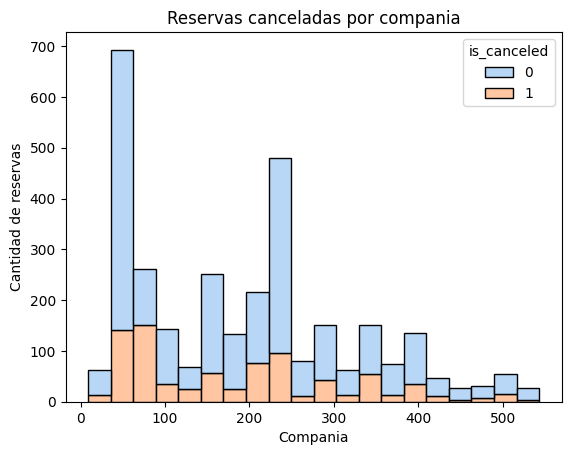

In [ ]:
sns.histplot(data = hotels, x="company", hue = 'is_canceled', palette='pastel', multiple = 'stack').set(title="Reservas canceladas por compania", xlabel="Compania", ylabel="Cantidad de reservas")
# grouped_by_company = hotels.groupby(['company'])['is_canceled'].agg(['count']).sort_values(by = 'count' , ascending = False)
grouped_by_company = hotels.groupby(['company'])['is_canceled'].value_counts()
grouped_by_company

Se puede ver que aquellas reservas realizadas por medio de una compania son menos propensas a ser canceladas

## agent

[Text(0.5, 1.0, 'Reservas canceladas por agente'),
 Text(0.5, 0, 'Agente'),
 Text(0, 0.5, 'Cantidad de reservas')]

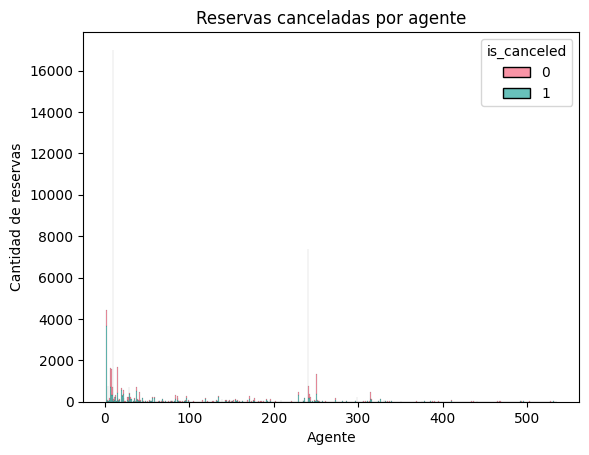

In [ ]:
sns.histplot(data = hotels, x="agent", hue = 'is_canceled', palette='husl', multiple = 'stack', binwidth = 1).set(title="Reservas canceladas por agente", xlabel="Agente", ylabel="Cantidad de reservas")

Para extraer conclusiones fuertes de los agentes habria que ver cuales son los mejores a la hora de consolidar reservas

## days_in_waiting_list

[Text(0.5, 1.0, 'Reservas canceladas por mas de 20 dias en lista de espera'),
 Text(0.5, 0, 'Dias de espera'),
 Text(0, 0.5, 'Cantidad de reservas')]

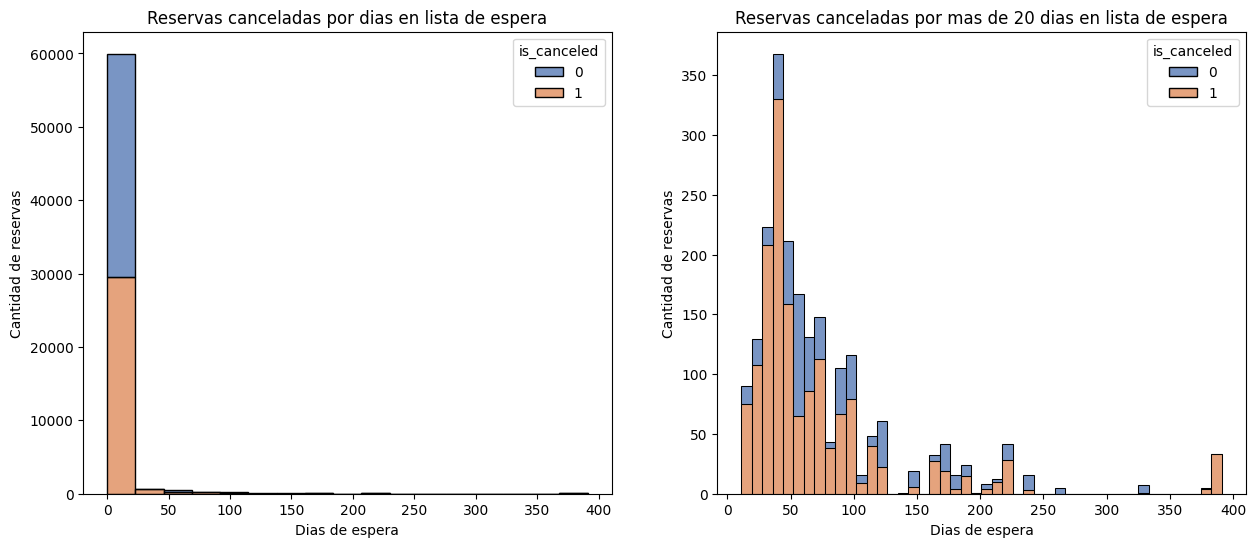

In [ ]:
fig, (full, over_20) = plt.subplots(1, 2, figsize=(15,6))
days_waiting_over_20 = hotels[hotels['days_in_waiting_list'] > 10]
sns.histplot(data = hotels, x = "days_in_waiting_list", hue = 'is_canceled', palette='deep', ax = full, multiple = 'stack').set(title="Reservas canceladas por dias en lista de espera", xlabel="Dias de espera", ylabel="Cantidad de reservas")
sns.histplot(data = days_waiting_over_20, x = "days_in_waiting_list", hue = 'is_canceled', palette='deep', ax = over_20, multiple = 'stack').set(title="Reservas canceladas por mas de 20 dias en lista de espera", xlabel="Dias de espera", ylabel="Cantidad de reservas")

Mientras mas dias de espera transcurrieron, las reservas fueron en su mayoria canceladas

## adr

Habiendo visto la correlacion en el heatmap, analicemos las variables adr y children.

[Text(0.5, 1.0, 'ADR de la reserva segun cantidad de niños'),
 Text(0.5, 0, 'Cantidad de niños'),
 Text(0, 0.5, 'adr')]

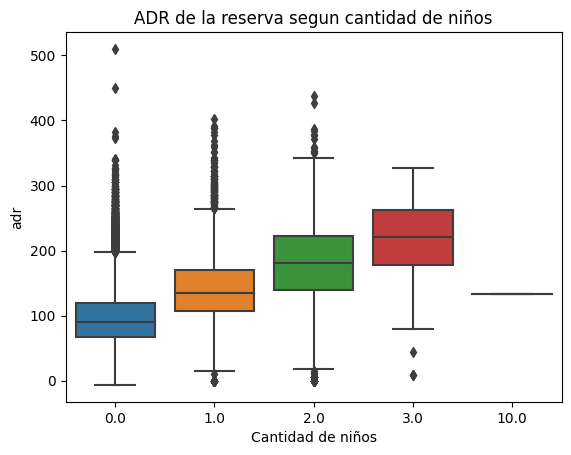

In [ ]:
sns.boxplot(data = hotels, x="children", y="adr").set(title="ADR de la reserva segun cantidad de niños", xlabel="Cantidad de niños", ylabel="adr")

Se puede ver que a medida que la cantidad de niños aumenta en la reserva, el adr suele aumentar también

## required_car_parking_spaces

[Text(0.5, 1.0, 'Reservas canceladas por lugares de estacionamiento requeridos'),
 Text(0.5, 0, 'Lugares para estacionar requeridos'),
 Text(0, 0.5, 'Cantidad de reservas')]

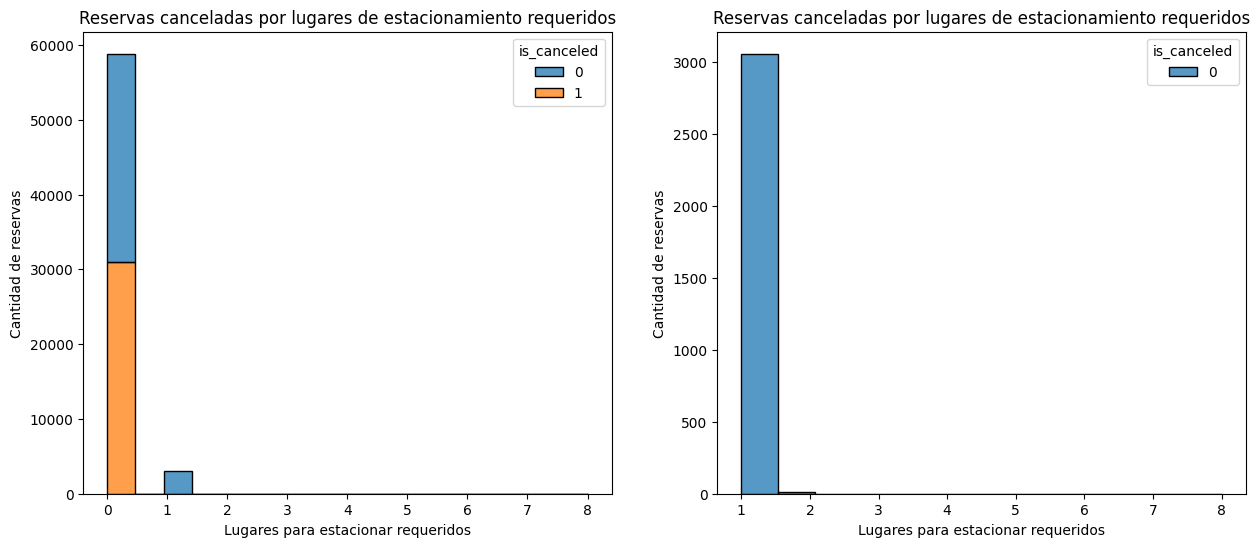

In [ ]:
fig, (full, ps_over_0) = plt.subplots(1, 2, figsize=(15,6))
filtered_over_0 = hotels[hotels['required_car_parking_spaces'] > 0]
sns.histplot(data = hotels, x = "required_car_parking_spaces", hue = 'is_canceled', multiple = 'stack', ax = full).set(title="Reservas canceladas por lugares de estacionamiento requeridos", xlabel="Lugares para estacionar requeridos", ylabel="Cantidad de reservas")
sns.histplot(data = filtered_over_0, x = "required_car_parking_spaces", hue = 'is_canceled', multiple = 'stack', ax = ps_over_0).set(title="Reservas canceladas por lugares de estacionamiento requeridos", xlabel="Lugares para estacionar requeridos", ylabel="Cantidad de reservas")

Ademas de la correlacion calculada en la seccion inicial, se puede ver como las reservas que pidieron por lo menos un lugar de estacionamiento no fueron canceladas, lo cual no es determinante pero es importante porque marca una tendencia

## total_of_special_requests

[Text(0.5, 1.0, 'Reservas canceladas por requerimientos especiales'),
 Text(0, 0.5, 'Requerimientos especiales'),
 Text(0.5, 0, 'Cantidad de reservas')]

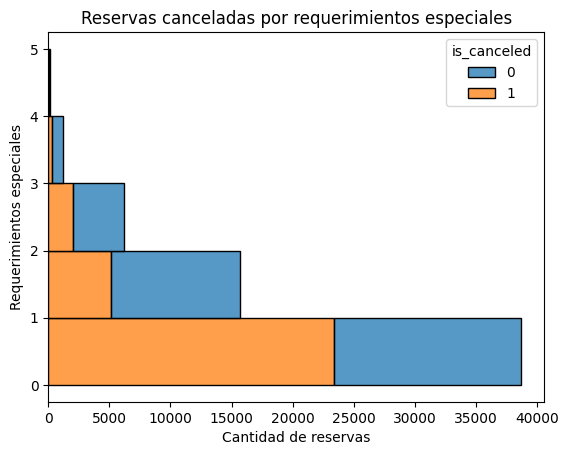

In [ ]:
sns.histplot(data = hotels, y = "total_of_special_requests", hue = 'is_canceled', multiple = 'stack', binwidth=1).set(title="Reservas canceladas por requerimientos especiales", ylabel="Requerimientos especiales", xlabel="Cantidad de reservas")

Aquellas reservas donde hubo al menos un pedido especial, son menos propensas a ser canceladas.


 # C) Datos Faltantes

In [ ]:
missing_data = hotels.columns[hotels.isna().any()]
hotels[missing_data].isnull().sum()


children        4
country       221
agent        7890
company     58761
dtype: int64

### Como podemos ver las columnas que cuentan con datos faltantess son:

* children
* country
* agent 
* company





#### children: 
#####A los 4 casilleros faltantes les agregamos el valor de la mediana

In [ ]:
hotels['children'].fillna(0,inplace = True)

#### country: 
#####A los 221 casilleros sin datos les agregamos 'PTR' que es el pais del cual mas personas hay en la muestra superando el 45%

In [ ]:
hotels['country'].fillna('PRT',inplace = True)

#### Agent y Company: 
##### Si bien vistos sin conocer pareceria que faltan datos, en realidad la falta de datos en estos casos significa que el cliente no contacto co ninguna compania por lo que no hay dato faltante

In [ ]:
#chequeo de funciono
missing_data = hotels.columns[hotels.isna().any()]
hotels[missing_data].isnull().sum()

agent       7890
company    58761
dtype: int64

# D) Valores atípicos

## Analizamos los box plot de las variables cuantitativas

### lead_time

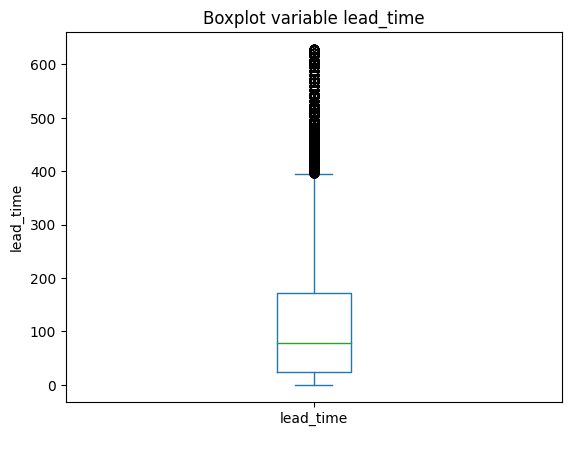

In [ ]:
grf=hotels['lead_time'].plot.box(title="Boxplot variable lead_time",xlabel=" ",ylabel="lead_time")

### stays_weekend_nights

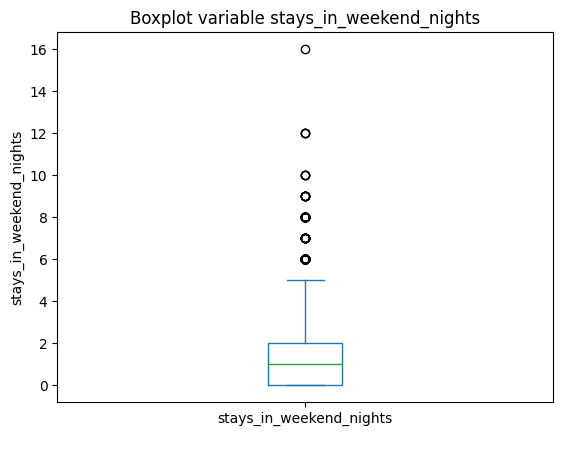

In [ ]:
grf=hotels['stays_in_weekend_nights'].plot.box(title="Boxplot variable stays_in_weekend_nights",xlabel=" ",ylabel="stays_in_weekend_nights")

### stays_week_nights

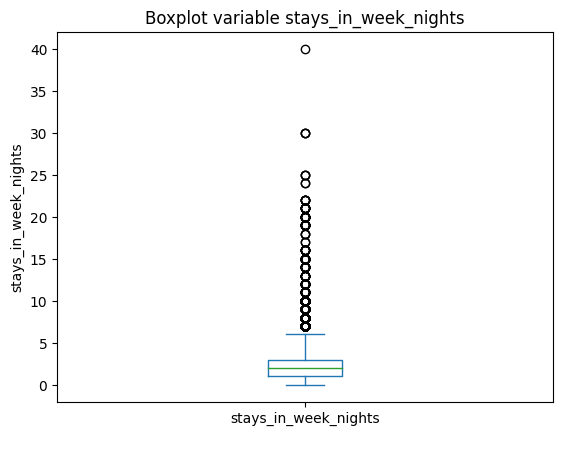

In [ ]:
grf=hotels['stays_in_week_nights'].plot.box(title="Boxplot variable stays_in_week_nights",xlabel=" ",ylabel="stays_in_week_nights")

### adults

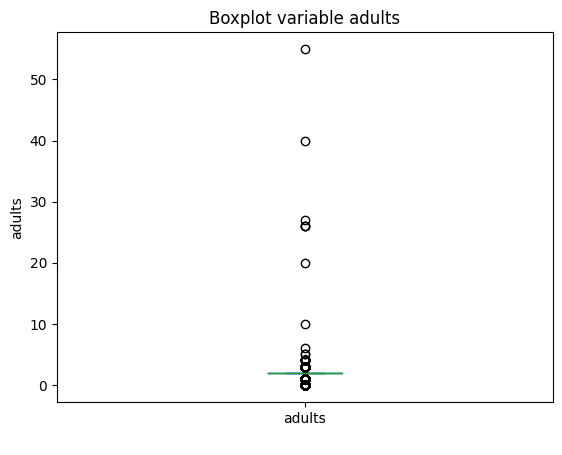

In [ ]:
grf=hotels['adults'].plot.box(title="Boxplot variable adults",xlabel=" ",ylabel="adults")

### children

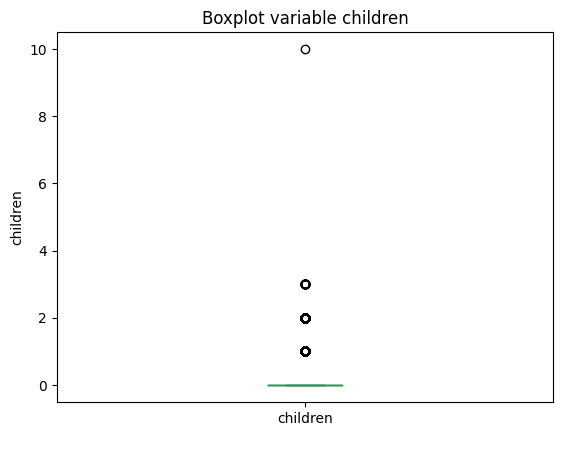

In [ ]:
grf=hotels['children'].plot.box(title="Boxplot variable children",xlabel=" ",ylabel="children")

### babies

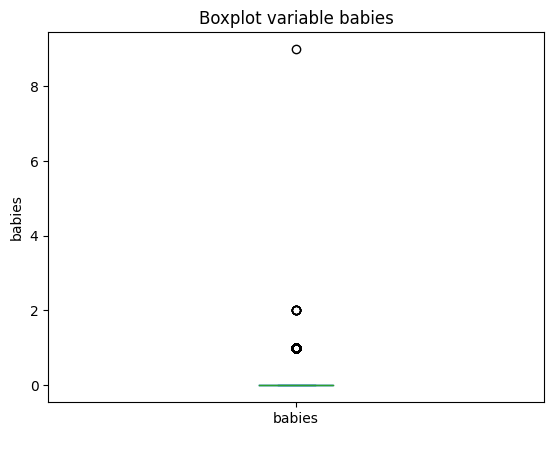

In [ ]:
grf=hotels['babies'].plot.box(title="Boxplot variable babies",xlabel=" ",ylabel="babies")

### previous_cancellations

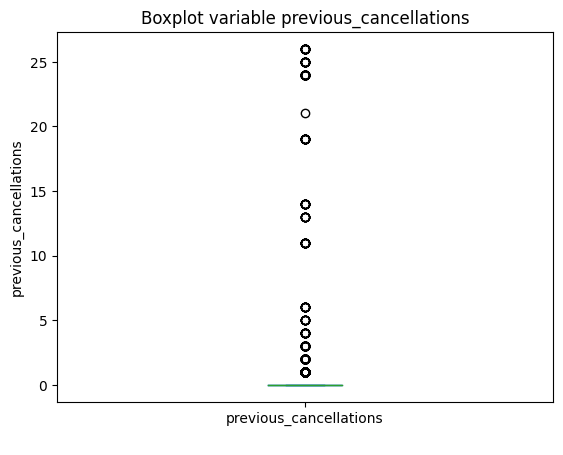

In [ ]:
grf=hotels['previous_cancellations'].plot.box(title="Boxplot variable previous_cancellations",xlabel=" ",ylabel="previous_cancellations")

### previous_bookings_not_canceled

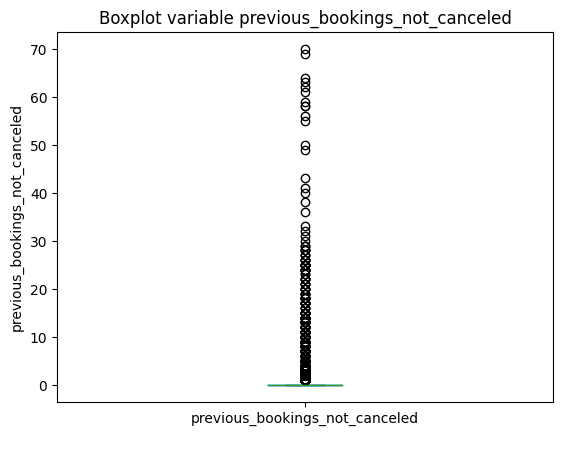

In [ ]:
grf=hotels['previous_bookings_not_canceled'].plot.box(title="Boxplot variable previous_bookings_not_canceled",xlabel=" ",ylabel="previous_bookings_not_canceled")

### booking_changes

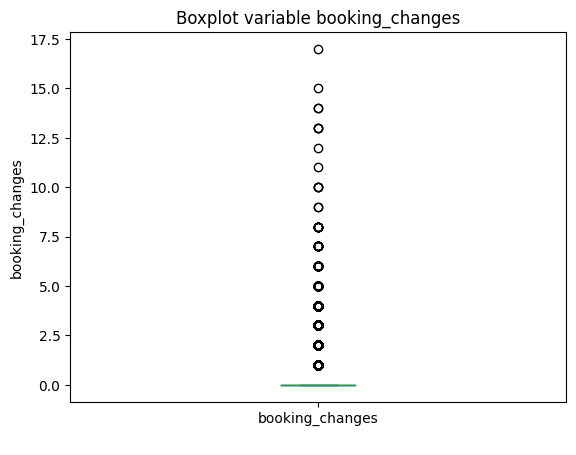

In [ ]:
grf=hotels['booking_changes'].plot.box(title="Boxplot variable booking_changes",xlabel=" ",ylabel="booking_changes")

### days_in_waiting_list

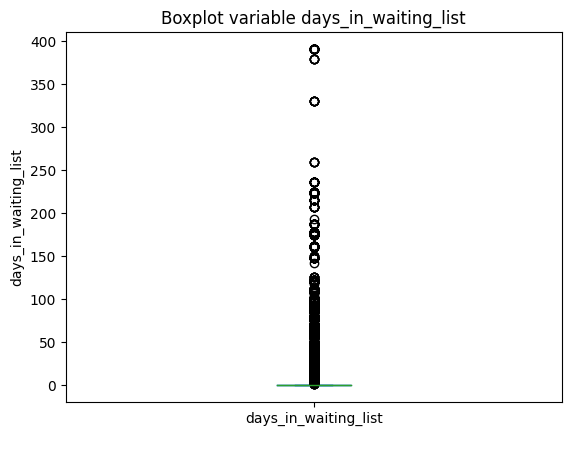

In [ ]:
grf=hotels['days_in_waiting_list'].plot.box(title="Boxplot variable days_in_waiting_list",xlabel=" ",ylabel="days_in_waiting_list")


### adr

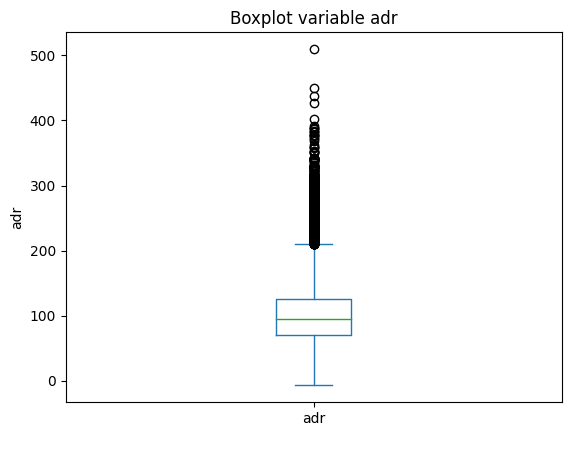

In [ ]:
grf=hotels['adr'].plot.box(title="Boxplot variable adr",xlabel=" ",ylabel="adr")


### required_car_parking_spaces

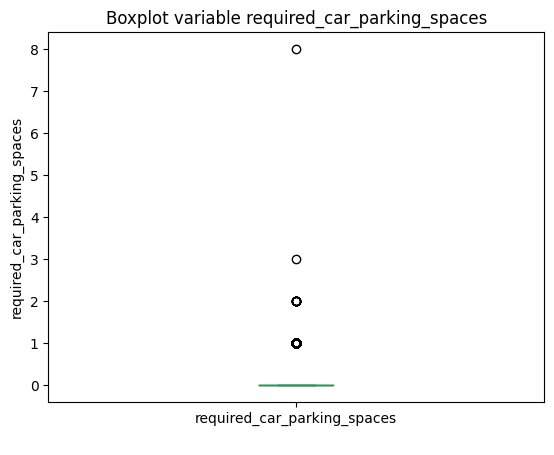

In [ ]:
grf=hotels['required_car_parking_spaces'].plot.box(title="Boxplot variable required_car_parking_spaces",xlabel=" ",ylabel="required_car_parking_spaces")


### total_of_special_requests

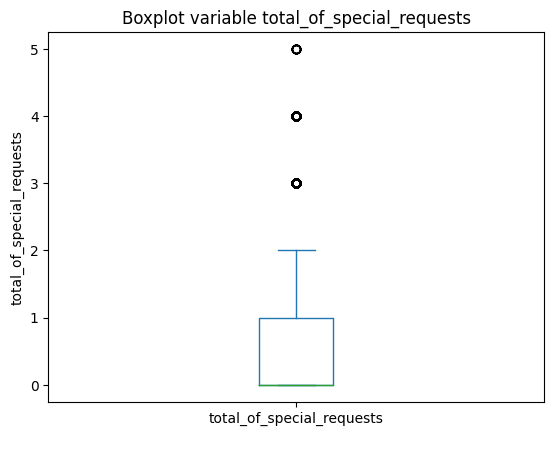

In [ ]:
grf=hotels['total_of_special_requests'].plot.box(title="Boxplot variable total_of_special_requests",xlabel=" ",ylabel="total_of_special_requests")


## Analisamos las variables en comparacion a otras -mientras tenga sentido-

### adults, children y babies

In [ ]:
no_parents= hotels[(hotels['adults'] == 0) & ((hotels['children'] >= 0) |(hotels['babies'] >= 0))]
no_parents.shape

(197, 32)

### stays_in_weekend_nights y stays_in_week_nights

In [ ]:
def tiene_sentido(data):
    weekend= data['stays_in_weekend_nights']
    week = data['stays_in_week_nights']
    for i in range(len(weekend)):
        if weekend[i] >= 3 :
            n = round((weekend[i]-3)/2)
            if week[i] < (5*n):
                print("No es posible")

tiene_sentido(hotels)

### adults y required_car_parking_spaces

In [ ]:
too_many_cars = hotels[hotels['required_car_parking_spaces']>hotels['adults']]
too_many_cars.shape

(4, 32)